### ML/DL HW3 - Data Analysis with NYC Taxi dataset

1. Copy this notebook and solve them by following the instruction.
2. Upload the dataset in your directory before executing this code.
  * Train data (71,514 rows; 2023/01/01-2023/01/23): [Download](https://drive.google.com/file/d/15Ne57MIFPFYgDMpbL5kOly9CjAoZe19r/view?usp=sharing)
  * Test data (28,390 rows; 2023/01/24-2023/01/31): [Download](https://drive.google.com/file/d/15Mi8vm2guvePB7RaY6LPi3fxXOwLFlyw/view?usp=sharing)
  * LocationID csv data : [Download](https://github.com/TanmayKedari/Exploratory-Analysis-of-NYC-Taxi/blob/master/taxi_zones.csv)

3. Note: Your code for all of the programming exercises including this one should be submitted to the corresponding Programming submission slot on Gradescope.

4. Note: You can change the structure of the code or change the logic as needed.

Reference
* https://github.com/TanmayKedari/Exploratory-Analysis-of-NYC-Taxi/blob/master/NYC%20Taxi%20Trip%20Duration.ipynb


### 1. Setup environment and upload dataset files
Install the required libraries. Also, upload New York taxi data files to Colab.

In [124]:
!pip install pandas pyarrow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
files1=files.upload()
files2=files.upload()
files3=files.upload()

In [125]:
import pyarrow.parquet as pq
df_train = pq.read_table('./yellow_tripdata_2023-01_small_train.parquet').to_pandas()
df_test = pq.read_table('./yellow_tripdata_2023-01_small_test.parquet').to_pandas()

In [126]:
df_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:33:53,2023-01-01 00:49:15,1.0,2.95,1.0,N,33,61,1,17.7,1.0,0.5,4.04,0.00,1.0,24.24,0.0,0.00
1,2,2023-01-01 00:47:59,2023-01-01 01:16:34,5.0,2.35,1.0,N,43,233,1,23.3,1.0,0.5,5.66,0.00,1.0,33.96,2.5,0.00
2,2,2023-01-01 00:59:58,2023-01-01 01:11:43,1.0,2.04,1.0,N,137,114,1,13.5,1.0,0.5,3.70,0.00,1.0,22.20,2.5,0.00
3,2,2023-01-01 00:53:50,2023-01-01 01:15:46,1.0,7.05,1.0,N,263,144,1,32.4,1.0,0.5,4.00,0.00,1.0,41.40,2.5,0.00
4,2,2023-01-01 00:09:27,2023-01-01 00:15:04,1.0,0.80,1.0,N,236,75,1,5.5,0.5,0.5,1.86,0.00,0.3,11.16,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71509,2,2023-01-23 23:13:59,2023-01-23 23:36:04,1.0,10.48,1.0,N,70,61,2,42.2,1.0,0.5,0.00,0.00,1.0,45.95,0.0,1.25
71510,2,2023-01-23 23:57:55,2023-01-24 00:37:38,1.0,17.65,2.0,N,132,163,1,70.0,0.0,0.5,22.20,0.00,1.0,97.45,2.5,1.25
71511,2,2023-01-23 23:24:38,2023-01-23 23:48:41,1.0,12.12,1.0,N,70,142,1,47.8,6.0,0.5,13.12,6.55,1.0,78.72,2.5,1.25
71512,2,2023-01-23 23:04:04,2023-01-23 23:12:30,1.0,1.64,1.0,N,68,163,2,10.7,1.0,0.5,0.00,0.00,1.0,15.70,2.5,0.00


In [127]:
df_train.tail(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
71509,2,2023-01-23 23:13:59,2023-01-23 23:36:04,1.0,10.48,1.0,N,70,61,2,42.2,1.0,0.5,0.00,0.00,1.0,45.95,0.0,1.25
71510,2,2023-01-23 23:57:55,2023-01-24 00:37:38,1.0,17.65,2.0,N,132,163,1,70.0,0.0,0.5,22.20,0.00,1.0,97.45,2.5,1.25
71511,2,2023-01-23 23:24:38,2023-01-23 23:48:41,1.0,12.12,1.0,N,70,142,1,47.8,6.0,0.5,13.12,6.55,1.0,78.72,2.5,1.25
71512,2,2023-01-23 23:04:04,2023-01-23 23:12:30,1.0,1.64,1.0,N,68,163,2,10.7,1.0,0.5,0.00,0.00,1.0,15.70,2.5,0.00
71513,2,2023-01-23 23:59:02,2023-01-24 00:12:46,1.0,4.03,1.0,N,43,68,2,19.1,1.0,0.5,0.00,0.00,1.0,24.10,2.5,0.00


In [128]:
taxi_zones = pd.read_csv('taxi_zones.csv')
print(len(taxi_zones))
taxi_zones.tail(5)
# LocationID = PULocationID = DOLocationID (264, 265 = Unknown)

263


,X,Y,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,Latitude,Longitude
258,1.023962e+06,266878.034018,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,42.307797,-96.930286
259,1.010930e+06,211369.883417,260,0.133514,0.000422,Woodside,260,Queens,37.429939,-122.253856
260,9.806682e+05,197575.689861,261,0.027120,0.000034,World Trade Center,261,Manhattan,36.375484,-81.758240
261,9.992531e+05,222193.818758,262,0.049064,0.000122,Yorkville East,262,Manhattan,43.112850,-75.271000
262,9.977632e+05,222907.634704,263,0.037017,0.000066,Yorkville West,263,Manhattan,31.759903,-97.102936


In [129]:
df_test.tail(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
28385,1,2023-01-31 22:32:00,2023-01-31 22:49:41,NaN,0.00,NaN,None,144,143,0,13.00,1.0,0.5,0.00,0.0,1.0,20.00,NaN,NaN
28386,2,2023-01-31 22:27:39,2023-01-31 22:45:27,NaN,4.56,NaN,None,186,238,0,20.00,0.0,0.5,4.80,0.0,1.0,28.80,NaN,NaN
28387,2,2023-01-31 22:40:00,2023-01-31 22:58:00,NaN,4.34,NaN,None,68,236,0,20.88,0.0,0.5,2.49,0.0,1.0,27.37,NaN,NaN
28388,1,2023-01-31 23:18:36,2023-01-31 23:27:44,NaN,0.00,NaN,None,48,229,0,3.90,0.0,0.5,0.00,0.0,1.0,7.90,NaN,NaN
28389,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.0,0.5,3.96,0.0,1.0,23.76,NaN,NaN


In [130]:
taxi_zones

,X,Y,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,Latitude,Longitude
0,9.352230e+05,190535.052575,1,0.116357,0.000782,Newark Airport,1,EWR,35.475594,-83.290731
1,1.032516e+06,167292.493195,2,0.433470,0.004866,Jamaica Bay,2,Queens,35.742300,-90.562330
2,1.025883e+06,254779.600631,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,33.293157,-86.767961
3,9.906188e+05,203105.532318,4,0.043567,0.000112,Alphabet City,4,Manhattan,40.724545,-73.979050
4,9.314680e+05,139837.478389,5,0.092146,0.000498,Arden Heights,5,Staten Island,39.809279,-75.486587
...,...,...,...,...,...,...,...,...,...,...
258,1.023962e+06,266878.034018,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,42.307797,-96.930286
259,1.010930e+06,211369.883417,260,0.133514,0.000422,Woodside,260,Queens,37.429939,-122.253856
260,9.806682e+05,197575.689861,261,0.027120,0.000034,World Trade Center,261,Manhattan,36.375484,-81.758240
261,9.992531e+05,222193.818758,262,0.049064,0.000122,Yorkville East,262,Manhattan,43.112850,-75.271000


In [131]:
taxi_zones.max()

X             1064866.094859
Y              267135.029941
OBJECTID                 263
Shape_Leng           0.43347
Shape_Area          0.004866
zone          Yorkville West
LocationID               263
borough        Staten Island
Latitude           55.540405
Longitude         -69.826495
dtype: object

In [132]:
taxi_zones.min()

X                       920436.336859
Y                       131469.141358
OBJECTID                            1
Shape_Leng                   0.014306
Shape_Area                   0.000006
zone          Allerton/Pelham Gardens
LocationID                          1
borough                         Bronx
Latitude                    25.963264
Longitude                 -131.105347
dtype: object

### 2.1. Calculate and assign new columns to the dataframe [3 pts]
Make weekday, month and pickup_hour which will help us to gain more insights from the data.

In [133]:
# Change to 'datetime' data type
df_train['tpep_pickup_datetime'] = pd.to_datetime(df_train['tpep_pickup_datetime'])   ### TODO: YOUR CODE HERE
df_train['tpep_dropoff_datetime'] = pd.to_datetime(df_train['tpep_dropoff_datetime'])  ### TODO: YOUR CODE HERE

# Calculate and assign new columns to the dataframe such as weekday,
# month and pickup_hour which will help us to gain more insights from the data.
df_train['weekday'] = df_train['tpep_pickup_datetime'].dt.day_name   ### TODO: YOUR CODE HERE
df_train['month'] = df_train['tpep_pickup_datetime'].dt.month   ### TODO: YOUR CODE HERE
df_train['weekday_num'] = df_train['tpep_pickup_datetime'].dt.weekday   ### TODO: YOUR CODE HERE
df_train['pickup_hour'] = df_train['tpep_pickup_datetime'].dt.hour   ### TODO: YOUR CODE HERE
df_train['trip_duration'] = df_train['tpep_dropoff_datetime'] - df_train['tpep_pickup_datetime']  ### TODO: YOUR CODE HERE
df_train['trip_duration']=df_train['trip_duration'].dt.seconds

### 2.2 Match places by latitude and longitude [2 pts]

---


Convert the IDs of the boarding and alighting locations to latitude and longitude through the given csv file.

In [134]:
list1=[]
for i in df_train['PULocationID']:
  if i>263:
    i=263
  list1.append(taxi_zones.loc[i-1,'Longitude'])
list2=[]
for i in df_train['PULocationID']:
  if i>263:
    i=263
  list2.append(taxi_zones.loc[i-1,'Latitude'])
list3=[]
for i in df_train['DOLocationID']:
  if i>263:
    i=263
  list3.append(taxi_zones.loc[i-1,'Longitude'])
list4=[]
for i in df_train['DOLocationID']:
  if i>263:
    i=263
  list4.append(taxi_zones.loc[i-1,'Latitude'])

In [135]:
df_train['PU_longitude'] = list1   ### TODO: YOUR CODE HERE
df_train['PU_latitude'] = list2   ### TODO: YOUR CODE HERE

df_train['DO_longitude'] = list3   ### TODO: YOUR CODE HERE
df_train['DO_latitude'] = list4   ### TODO: YOUR CODE HERE

### 2.3. Analysis of trip duration and pickup hour [2 pts]

Trip duration is analyzed based on pickup hour. Draw a graph by averaging the trip duration for each pickup hour. \
You can use any library (e.g., seaborn, matplot, pandas, etc) for this part.

(Example)
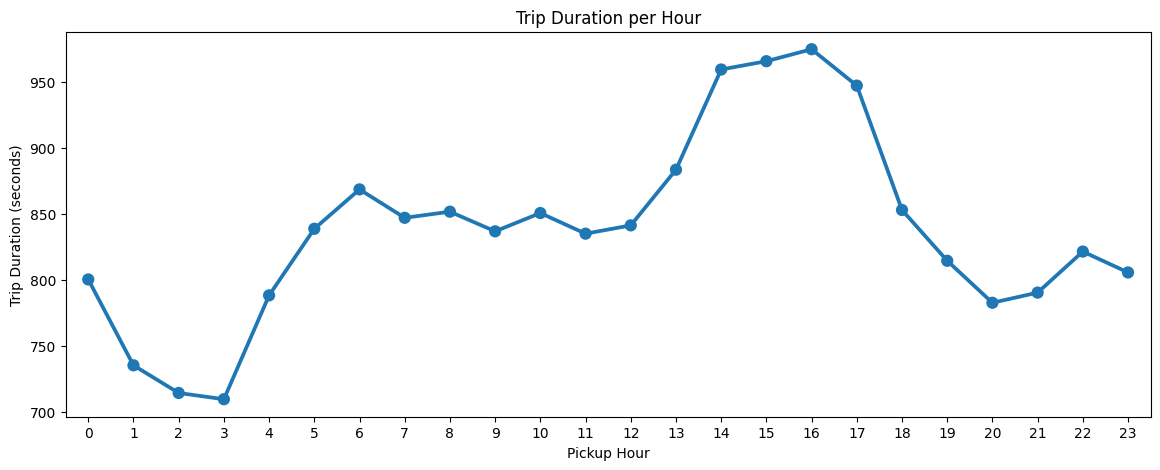

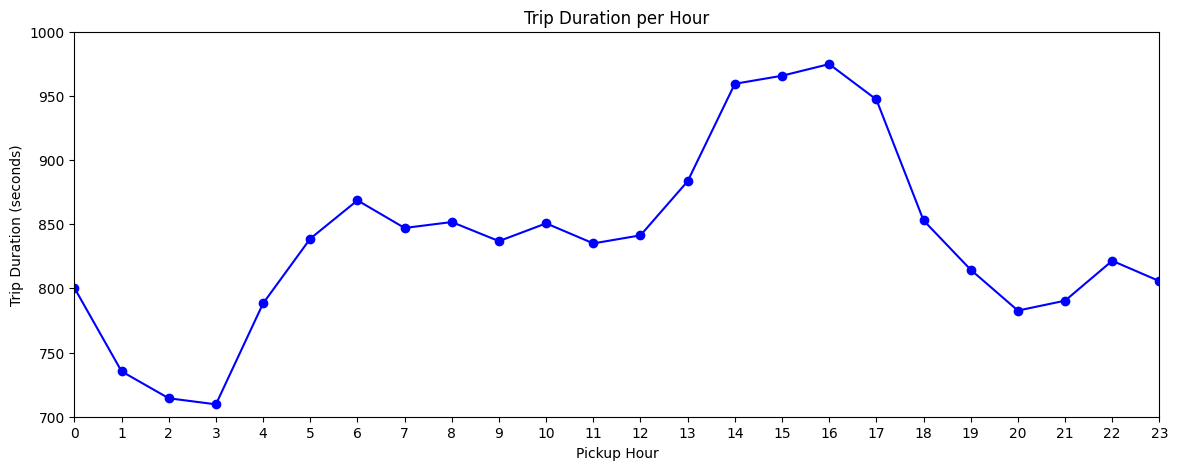

In [136]:
plt.figure(figsize = (14,5))
group1 = df_train['trip_duration'].groupby(df_train['pickup_hour']).mean()
### TODO: YOUR CODE HERE

plt.plot(range(df_train['pickup_hour'].max()+1),group1,'bo-')
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Duration (seconds)')
plt.axis([0, 23, 700, 1000])
plt.xticks(range(df_train['pickup_hour'].max()+1))
plt.title('Trip Duration per Hour')

plt.show()

### 2.4. Analysis of trip duration and weekday [2 pts]

Trip duration is analyzed based on what time you boarded. Draw a graph by averaging the trip duration for each weekday. \
You can use (e.g., seaborn, matplot, pandas, etc) for this part.

(Example)
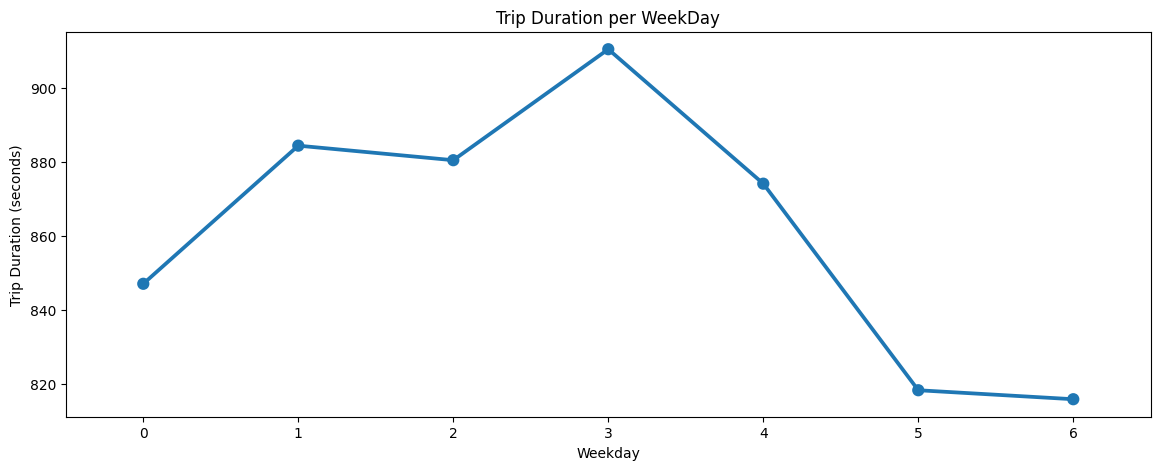

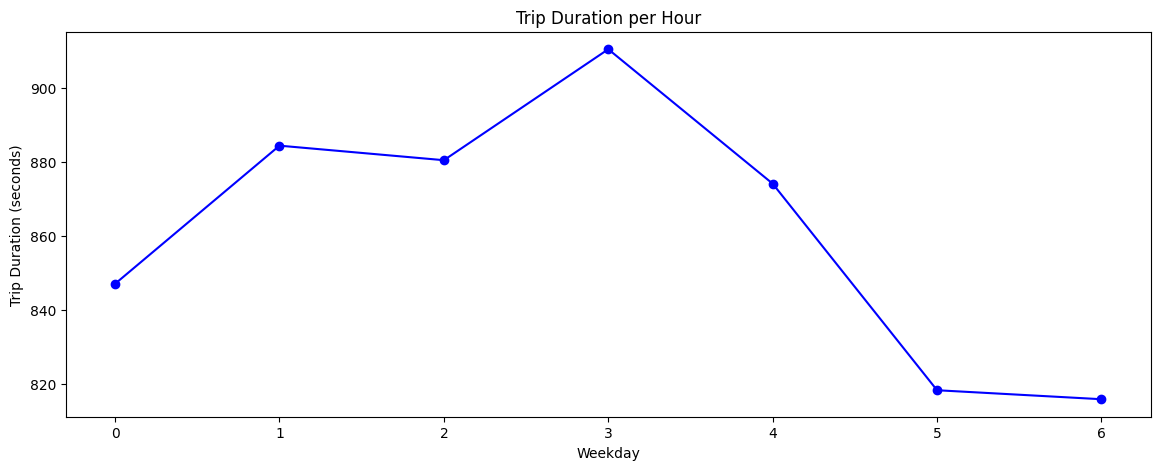

In [137]:
plt.figure(figsize = (14,5))
group2 = df_train['trip_duration'].groupby(df_train['weekday_num']).mean()
### TODO: YOUR CODE HERE

plt.plot(range(df_train['weekday_num'].max()+1),group2,'bo-')
plt.xlabel('Weekday')
plt.ylabel('Trip Duration (seconds)')
plt.xticks(range(df_train['weekday_num'].max()+1))
plt.title('Trip Duration per Hour')

plt.show()

### 2.5 Visualize pick-up points and drop-off points [3 pts]
Visualize each pick-up points and drop-off points. The x-axis is longitude, and the y-axis is latitude. You can use any library including matplotlib.

(Example visualization)


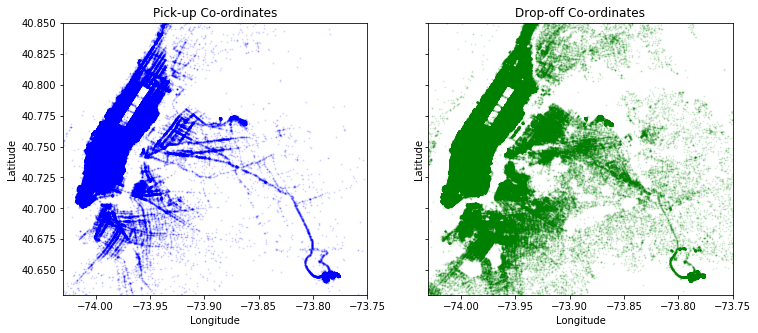

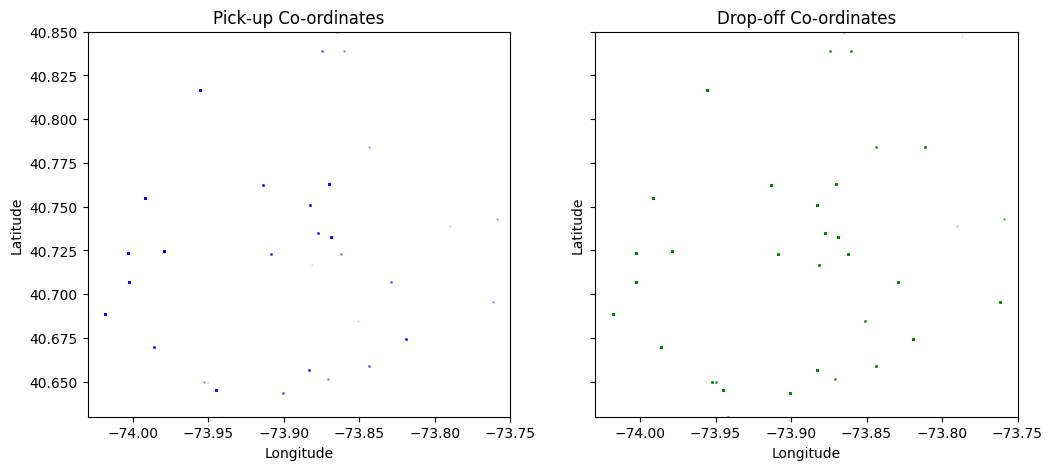

In [138]:
city_long_border = (-74.03, -73.75) ### TODO: YOUR CODE HERE
city_lat_border = (40.63, 40.85) ### TODO: YOUR CODE HERE

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize = (12,5))
ax[0].scatter(df_train['PU_longitude'].values, df_train['PU_latitude'].values,
color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(df_train['DO_longitude'].values, df_train['DO_latitude'].values,
color='green', s=1, label='train', alpha=0.1)
ax[1].set_title('Drop-off Co-ordinates')
ax[0].set_title('Pick-up Co-ordinates')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

### TODO: Draw a graph and setup each axis
#데이터가 많이 적네요

### 3.1 Make dataet & preprocessing [2 pts]
Write a code to make dataset. You can use preprocessing as needed.



In [183]:
# Check the below cells before fill in your code.

import pyarrow.parquet as pq

class Dataset:
  train_x = None # X (data) of training set.
  train_y = None  # Y (label) of training set.
  test_x = None # X (data) of test set.
  test_y = None # Y (label) of test set.

  def __init__(self):
    self.df_train = pq.read_table('./yellow_tripdata_2023-01_small_train.parquet').to_pandas()
    self.df_test = pq.read_table('./yellow_tripdata_2023-01_small_test.parquet').to_pandas()
    self.df_train = self.preprocess_data(self.df_train)
    self.df_test = self.preprocess_data(self.df_test)

  def preprocess_data(self, df):
    ### TODO: Preprocess your data, use your preprocessing code above (Impute null values; DO NOT drop any test cases)
    self.df_train['tpep_pickup_datetime'] = pd.to_datetime(df_train['tpep_pickup_datetime'])   ### TODO: YOUR CODE HERE
    self.df_train['tpep_dropoff_datetime'] = pd.to_datetime(df_train['tpep_dropoff_datetime'])  ### TODO: YOUR CODE HERE

    self.df_train['weekday'] = self.df_train['tpep_pickup_datetime'].dt.day_name   ### TODO: YOUR CODE HERE
    self.df_train['month'] = self.df_train['tpep_pickup_datetime'].dt.month   ### TODO: YOUR CODE HERE
    self.df_train['weekday_num'] = self.df_train['tpep_pickup_datetime'].dt.weekday   ### TODO: YOUR CODE HERE
    self.df_train['pickup_hour'] = self.df_train['tpep_pickup_datetime'].dt.hour   ### TODO: YOUR CODE HERE
    self.df_train['trip_duration'] = self.df_train['tpep_dropoff_datetime'] - df_train['tpep_pickup_datetime']  ### TODO: YOUR CODE HERE
    self.df_train['trip_duration'] = self.df_train['trip_duration'].dt.seconds

    self.df_test['trip_duration'] = self.df_test['tpep_dropoff_datetime'] - df_test['tpep_pickup_datetime']  ### TODO: YOUR CODE HERE
    self.df_test['trip_duration'] = self.df_test['trip_duration'].dt.seconds
    self.df_test['passenger_count']=self.df_test['passenger_count'].fillna(0)
    self.df_test['RatecodeID']=self.df_test['RatecodeID'].fillna(1)
    self.df_test['store_and_fwd_flag']=self.df_test['store_and_fwd_flag'].fillna('N')
    self.df_test['congestion_surcharge']=self.df_test['congestion_surcharge'].fillna(0)
    self.df_test['airport_fee']=self.df_test['airport_fee'].fillna(0)

    self.df_train['PU_longitude'] = list1   ### TODO: YOUR CODE HERE
    self.df_train['PU_latitude'] = list2   ### TODO: YOUR CODE HERE

    self.df_train['DO_longitude'] = list3   ### TODO: YOUR CODE HERE
    self.df_train['DO_latitude'] = list4   ### TODO: YOUR CODE HERE
    return df

  def getdata_linear_reg(self):
    ### Hint: Use self.df_train, self.df_test
    ### Three features (x): Passenger_count, trip_distance, trip_duration (seconds; use tpep_pickup_datetime, tpep_dropoff_datetime)
    ### Target (y): fare_amount
    self.train_x = self.df_train[['passenger_count','trip_distance','trip_duration']]  ### TODO: YOUR CODE HERE
    self.train_y = self.df_train['fare_amount']  ### TODO: YOUR CODE HERE
    self.test_x = self.df_test[['passenger_count','trip_distance','trip_duration']] ### TODO: YOUR CODE HERE
    self.test_y = self.df_test['fare_amount'] ### TODO: YOUR CODE HERE
    return [self.train_x, self.train_y, self.test_x, self.test_y]

  def correlation(self, X, Y):
    ### TODO: Correlation with each features - Optional: it may or may not need for this HW.
    pass



### 3.2 Make Multiple Linear Regression model [3 pts]

In [140]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [184]:
dataset=Dataset()
dataset.getdata_linear_reg()

[       passenger_count  trip_distance  trip_duration
 0                  1.0           2.95            922
 1                  5.0           2.35           1715
 2                  1.0           2.04            705
 3                  1.0           7.05           1316
 4                  1.0           0.80            337
 ...                ...            ...            ...
 71509              1.0          10.48           1325
 71510              1.0          17.65           2383
 71511              1.0          12.12           1443
 71512              1.0           1.64            506
 71513              1.0           4.03            824
 
 [71514 rows x 3 columns],
 0        17.7
 1        23.3
 2        13.5
 3        32.4
 4         5.5
          ... 
 71509    42.2
 71510    70.0
 71511    47.8
 71512    10.7
 71513    19.1
 Name: fare_amount, Length: 71514, dtype: float64,
        passenger_count  trip_distance  trip_duration
 0                  1.0           1.78            472

1.Multiple Linear Regression

In [142]:
start_time = time.time()
lm_regression = LinearRegression()
lm_regression = lm_regression.fit(dataset.train_x, dataset.train_y)
end_time = time.time()
lm_time = (end_time - start_time)
print(f"Time taken to train linear regression model : {lm_time} seconds")

Time taken to train linear regression model : 0.022854089736938477 seconds


In [143]:
trips = lm_regression.predict(dataset.test_x)

In [144]:
predictions = pd.DataFrame({'Actual': dataset.test_y.to_numpy().flatten(), 'Predicted': trips.flatten()})

In [145]:
predictions

,Actual,Predicted
0,10.70,11.506349
1,5.10,6.728517
2,16.30,16.774681
3,18.40,17.893527
4,9.30,10.166784
...,...,...
28385,13.00,9.279287
28386,20.00,22.652957
28387,20.88,22.072529
28388,3.90,6.585239


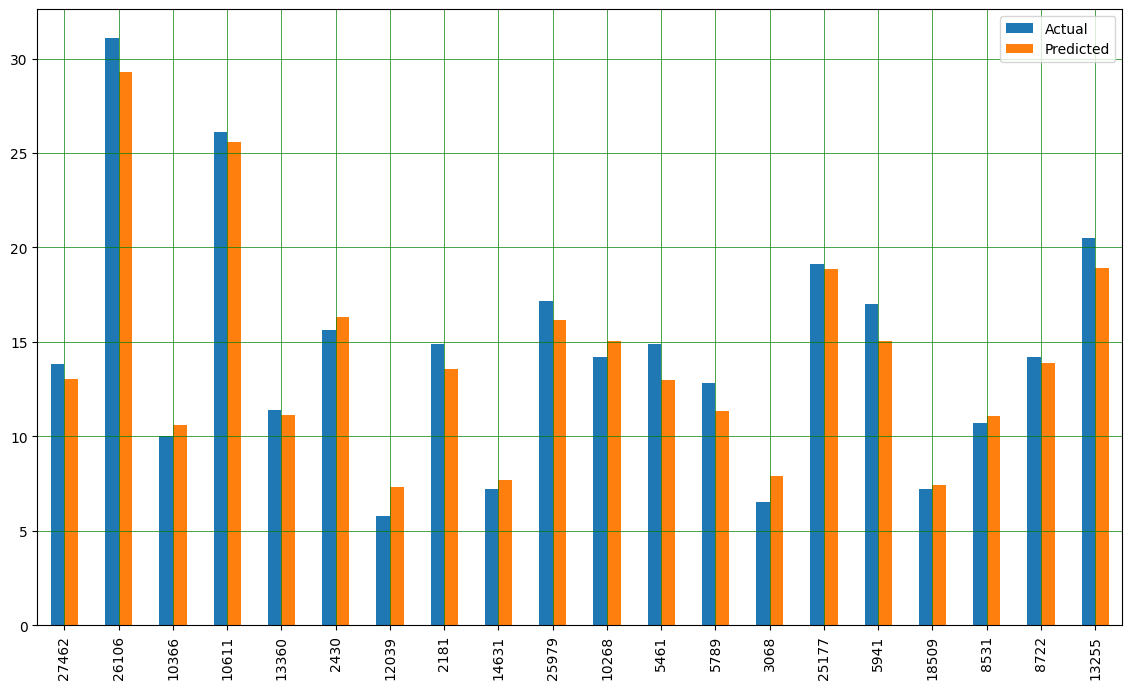

In [146]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [147]:
lm_score = r2_score(dataset.test_y, trips)
print(lm_score)

0.8294290333390429


2.Decision Tree

In [148]:
start_time = time.time()
dt_regression = DecisionTreeRegressor()
dt_regression = dt_regression.fit(dataset.train_x, dataset.train_y)
end_time = time.time()
dt_time = (end_time - start_time)
print(f"Time taken to train Decision tree model : {dt_time} seconds")

Time taken to train Decision tree model : 0.301882266998291 seconds


In [149]:
trips = dt_regression.predict(dataset.test_x)
predictions = pd.DataFrame({'Actual': dataset.test_y.to_numpy().flatten(), 'Predicted': trips.flatten()})
print(predictions)

       Actual  Predicted
0       10.70      10.70
1        5.10       5.10
2       16.30      16.30
3       18.40      17.00
4        9.30       9.30
...       ...        ...
28385   13.00      14.90
28386   20.00      21.90
28387   20.88      21.90
28388    3.90      12.25
28389   15.80      17.00

[28390 rows x 2 columns]


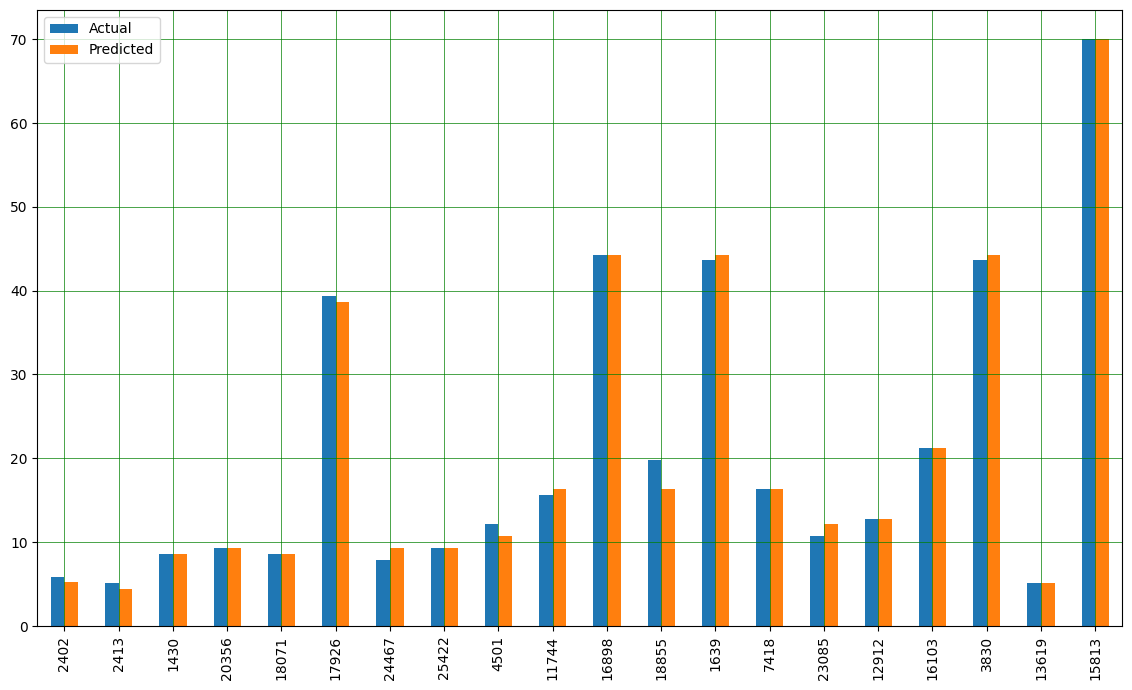

In [150]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [151]:
dt_score = r2_score(dataset.test_y, trips)
print(dt_score)

0.71994631392271


3.Random Forest

In [152]:
start_time = time.time()
rf_regression = RandomForestRegressor()
rf_regression = rf_regression.fit(dataset.train_x, dataset.train_y)
end_time = time.time()
rf_time = (end_time - start_time)
print(f"Time taken to train Random Forest model : {rf_time} seconds")

Time taken to train Random Forest model : 35.27419924736023 seconds


In [153]:
trips = rf_regression.predict(dataset.test_x)
predictions = pd.DataFrame({'Actual': dataset.test_y.to_numpy().flatten(), 'Predicted': trips.flatten()})
predictions

,Actual,Predicted
0,10.70,10.637000
1,5.10,5.071000
2,16.30,15.579000
3,18.40,17.628600
4,9.30,9.199667
...,...,...
28385,13.00,15.977500
28386,20.00,22.159000
28387,20.88,22.292000
28388,3.90,11.478767


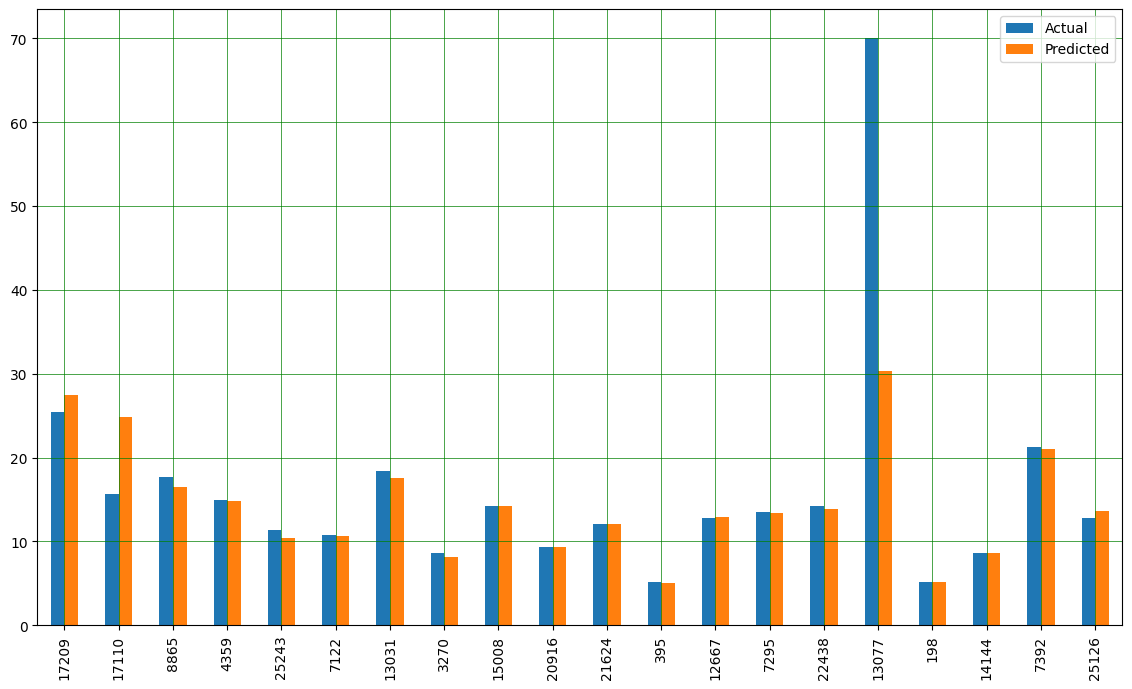

In [154]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [155]:
rf_score = r2_score(dataset.test_y, trips)
print(rf_score)

0.8167850771807295


4.AdaBoost

In [156]:
start_time = time.time()
regression = AdaBoostRegressor()
regression = regression.fit(dataset.train_x, dataset.train_y)
end_time = time.time()
ad_time = (end_time - start_time)
print(f"Time taken to train AdaBoost model : {ad_time} seconds")

Time taken to train AdaBoost model : 0.8605282306671143 seconds


In [157]:
trips = regression.predict(dataset.test_x)
predictions = pd.DataFrame({'Actual': dataset.test_y.to_numpy().flatten(), 'Predicted': trips.flatten()})
predictions

,Actual,Predicted
0,10.70,11.208821
1,5.10,10.546044
2,16.30,19.842310
3,18.40,19.842310
4,9.30,10.546044
...,...,...
28385,13.00,15.111106
28386,20.00,19.842310
28387,20.88,19.842310
28388,3.90,15.111106


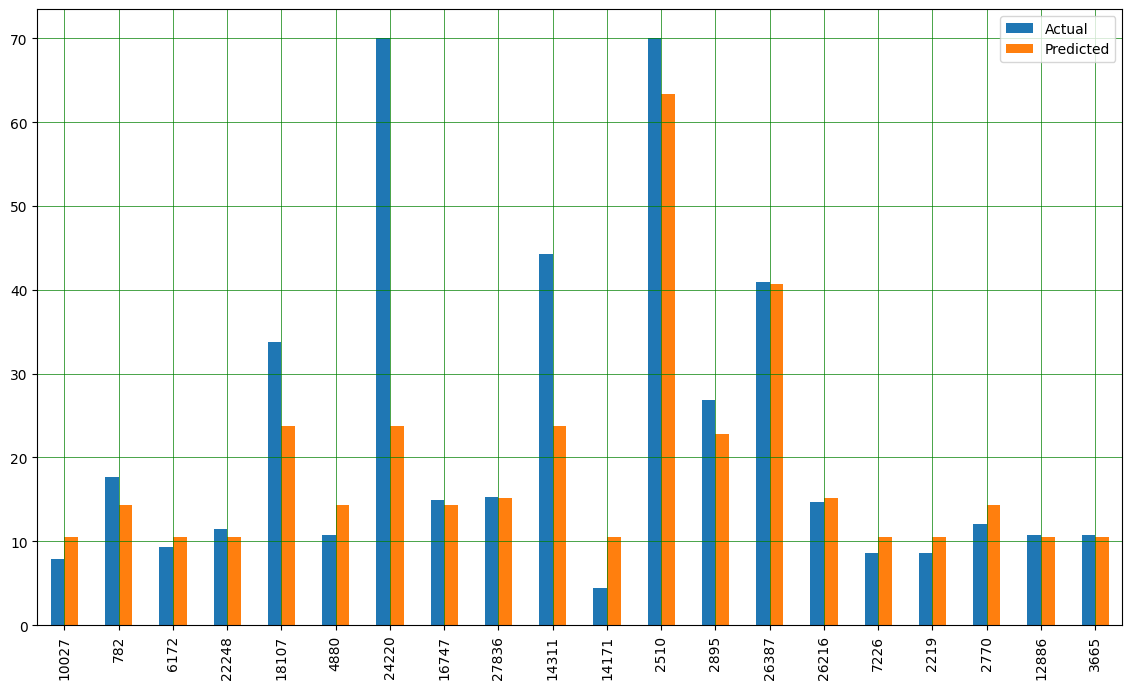

In [158]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [159]:
ad_score = r2_score(dataset.test_y, trips)
print(ad_score)

0.3997031472170327


5.Gradient Boost

In [160]:
start_time = time.time()
regression = GradientBoostingRegressor()
regression = regression.fit(dataset.train_x, dataset.train_y)
end_time = time.time()
gd_time = (end_time - start_time)
print(f"Time taken to train Gradient Boost model : {gd_time} seconds")

Time taken to train Gradient Boost model : 5.937010765075684 seconds


In [161]:
trips = regression.predict(dataset.test_x)
predictions = pd.DataFrame({'Actual': dataset.test_y.to_numpy().flatten(), 'Predicted': trips.flatten()})
predictions

,Actual,Predicted
0,10.70,10.301487
1,5.10,6.007391
2,16.30,15.895258
3,18.40,16.800870
4,9.30,9.323950
...,...,...
28385,13.00,16.005018
28386,20.00,22.362564
28387,20.88,21.361962
28388,3.90,10.963540


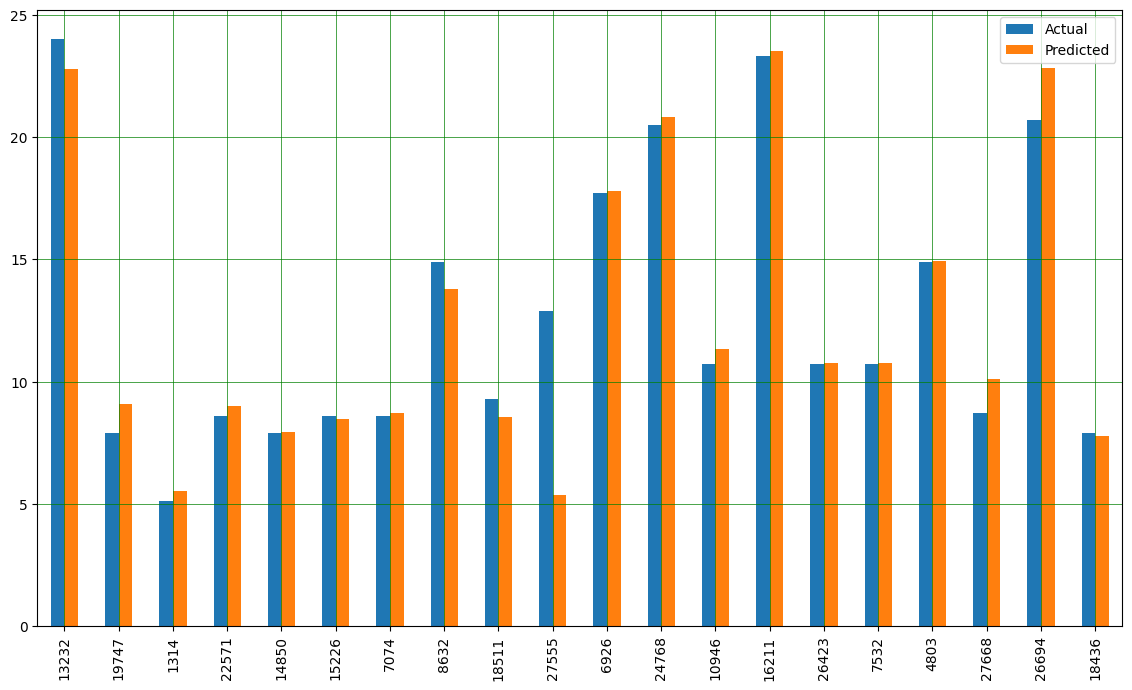

In [162]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [163]:
gd_score = r2_score(dataset.test_y, trips)
print(gd_score)

0.8497723563685756


6.XGBoost

In [164]:
start_time = time.time()
regression = XGBRegressor(objective ='reg:squarederror')
regression = regression.fit(dataset.train_x, dataset.train_y)
end_time = time.time()
xgb_time = (end_time - start_time)
print(f"Time taken to train XGBoost  model : {xgb_time} seconds")

Time taken to train XGBoost  model : 0.43757152557373047 seconds


In [165]:
trips = regression.predict(dataset.test_x)
predictions = pd.DataFrame({'Actual': dataset.test_y.to_numpy().flatten(), 'Predicted': trips.flatten()})
predictions

,Actual,Predicted
0,10.70,10.497102
1,5.10,5.041442
2,16.30,15.771790
3,18.40,16.813620
4,9.30,9.091877
...,...,...
28385,13.00,29.344143
28386,20.00,21.729673
28387,20.88,21.051615
28388,3.90,20.153112


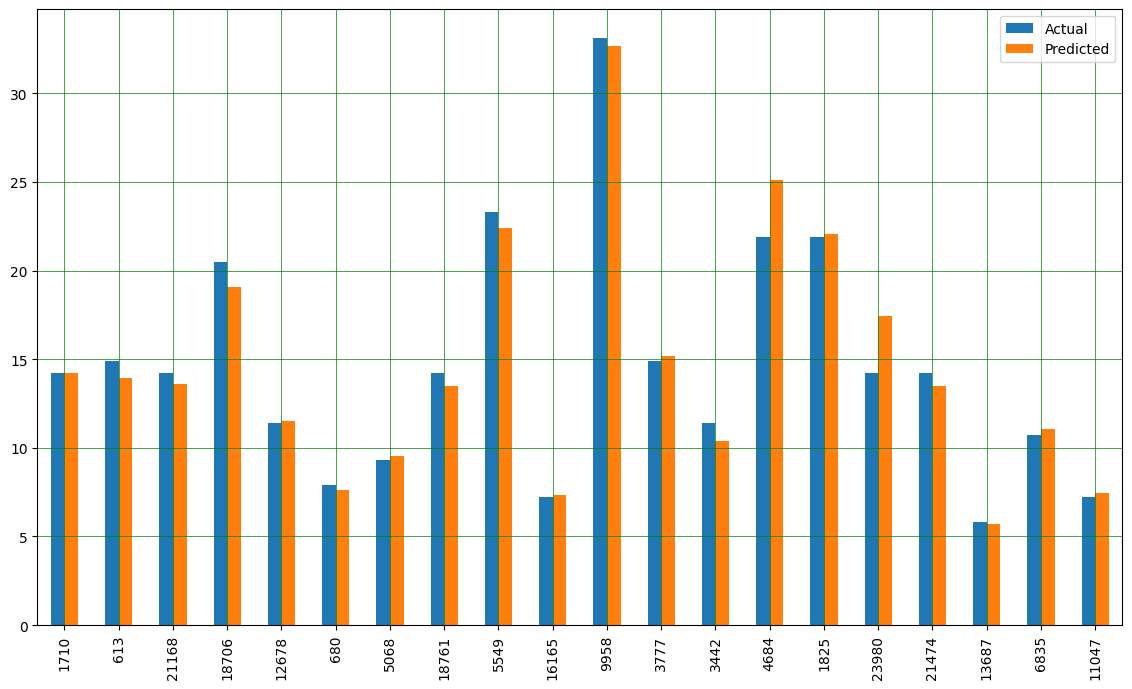

In [166]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [167]:
xgb_score = r2_score(dataset.test_y, trips)
print(xgb_score)

0.8198249067181147


In [172]:
r2 = [lm_score, dt_score, rf_score, ad_score, gd_score, xgb_score]
tm = [lm_time, dt_time, rf_time, ad_time, gd_time, xgb_time]
comp = pd.DataFrame({'Time': tm, 'Accu': r2})

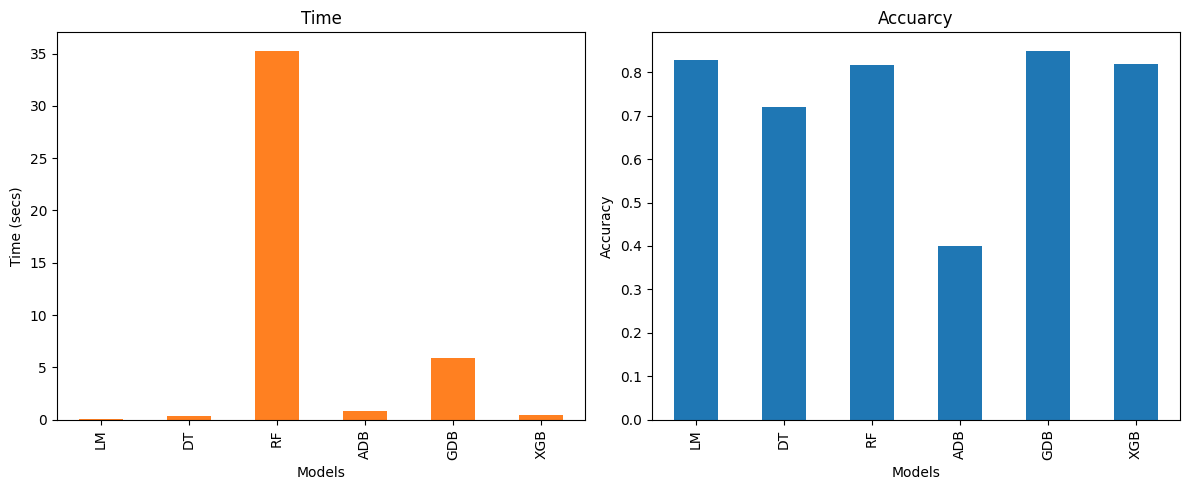

In [173]:
label = ['LM', 'DT', 'RF', 'ADB', 'GDB', 'XGB']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = comp['Time'].plot(kind='bar',title="Time",ax=axes[0],color = (1, 0.5, 0.13))
ax1 = comp['Accu'].plot(kind='bar',title="Accuarcy",ax=axes[1])
ax.set_ylabel("Time (secs)")
ax.set_xlabel('Models')
ax.set_xticklabels(label)
ax1.set_ylabel("Accuracy")
ax1.set_xlabel('Models')
ax1.set_xticklabels(label)
fig.tight_layout()

In [168]:
# Write a code to make Multiple Linear Regression model and analyze your results.

### TODO: YOUR CODE HERE

### 3.3 Backward stepwise selection with validation [7 pts]

*   We use backward stepwise selection to analyze the impact of each feature on linear regression.
*   Each model measures the error by including all features but excluding one feature.
*   The features to be used for linear regression model training are "PU_longitude", "PU_latitude", "DO_longitude", "DO_latitude", “pickup hour”, “weekday”, and “trip duration”. The value to predict is "fare_amount".
*   We make validation set to search for one feature to remove.
*   The train dataset is divided into 4 parts, 75% is used for training, and 25% is used for validation.
*   Compare the results of Multiple Linear Regression models with one feature removed.



In [207]:
col=['PU_longitude','PU_latitude','DO_longitude','DO_latitude','pickup_hour','weekday_num','trip_duration']

newtrain_x,newtest_x,newtrain_y,newtest_y=train_test_split(dataset.df_train[col], dataset.df_train['fare_amount'], test_size=0.25,random_state = 7294)

In [208]:
new_score=[]

regression = GradientBoostingRegressor()

for i in col:
  regression = regression.fit(newtrain_x[list(set(col) - set(i))], newtrain_y)

  trips = regression.predict(newtest_x[list(set(col) - set(i))])
  new_score.append(r2_score(newtest_y, trips))


In [211]:
new_score

[0.7570019089596561,
 0.7569512489626079,
 0.7569732892879861,
 0.7567373119137433,
 0.756979313550874,
 0.7567377443096386,
 0.7567288775892398]

All features do not have significant differences.

### 4. Multiple Linear regression with L1, L2 regularization [6 pts]



1.   Apply regularization to multiple linear regression models.
  *   Create a model using L1 and L2 regularization, respectively.
  *   The features to be used for linear regression model training are "PU_longitude", "PU_latitude", "DO_longitude", "DO_latitude", “pickup hour”, “weekday”, and “trip duration”.
  *   The value to predict is "fare_amount".

2.   Compare it to the basic multiple linear regression model without L1 and L2 regularization.


In [170]:
# Do a multiple linear regression with L1, L2 regularization, then analyze your results.

### TODO: YOUR CODE HERE
### TODO: YOUR CODE HERE

In [171]:
# Compare with basic multiple linear regression model

### TODO: YOUR CODE HERE
### TODO: YOUR CODE HERE